# **Importing Libraries**

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Read Data**

In [41]:
registered = pd.read_csv('registered.csv')
engagement = pd.read_csv('engagement.csv')
course = pd.read_csv('course.csv')

# **Analysis**

# **Registered vs Active Users**

In [42]:
print(registered.head())

   student_id student_country date_registered
0      258798              IN      2022-01-01
1      258799              CO      2022-01-01
2      258800              CA      2022-01-01
3      258801              IN      2022-01-01
4      258802              US      2022-01-01


In [43]:
print(registered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35230 entries, 0 to 35229
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   student_id       35230 non-null  int64 
 1   student_country  35217 non-null  object
 2   date_registered  35230 non-null  object
dtypes: int64(1), object(2)
memory usage: 825.8+ KB
None


In [44]:
registered['date_registered'] = pd.to_datetime(registered['date_registered'],format='%Y-%m-%d')
print(registered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35230 entries, 0 to 35229
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   student_id       35230 non-null  int64         
 1   student_country  35217 non-null  object        
 2   date_registered  35230 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 825.8+ KB
None


In [45]:
registered['month_name'] = registered['date_registered'].dt.month_name()
print(registered)

       student_id student_country date_registered month_name
0          258798              IN      2022-01-01    January
1          258799              CO      2022-01-01    January
2          258800              CA      2022-01-01    January
3          258801              IN      2022-01-01    January
4          258802              US      2022-01-01    January
...           ...             ...             ...        ...
35225      295511              CM      2022-10-20    October
35226      295512              CA      2022-10-20    October
35227      295513              SA      2022-10-20    October
35228      295514              NL      2022-10-20    October
35229      295515              SG      2022-10-20    October

[35230 rows x 4 columns]


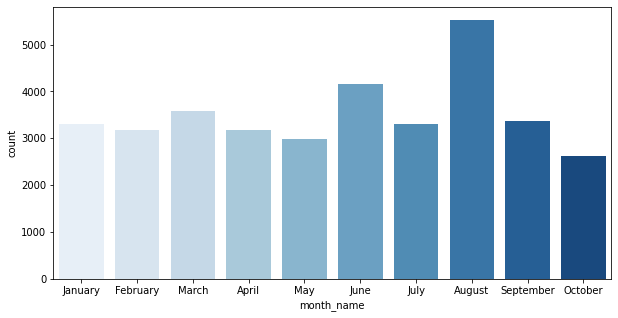

In [46]:
plt.figure(figsize = (10,5))
sns.countplot(data=registered,x='month_name',palette='Blues')

In [47]:
print(engagement.head())

   engagement_id  student_id  engagement_quizzes  engagement_exams  \
0              1      274999                   1                 1   
1              3      274501                   0                 0   
2              4      272842                   1                 1   
3              8      275173                   0                 0   
4             11      274876                   0                 1   

   engagement_lessons date_engaged  
0                   1   2022-05-27  
1                   1   2022-05-27  
2                   1   2022-05-27  
3                   1   2022-05-27  
4                   0   2022-05-27  


In [48]:
print(engagement.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65371 entries, 0 to 65370
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   engagement_id       65371 non-null  int64 
 1   student_id          65371 non-null  int64 
 2   engagement_quizzes  65371 non-null  int64 
 3   engagement_exams    65371 non-null  int64 
 4   engagement_lessons  65371 non-null  int64 
 5   date_engaged        65371 non-null  object
dtypes: int64(5), object(1)
memory usage: 3.0+ MB
None


In [49]:
lessons = engagement.loc[engagement['engagement_lessons']==1][['student_id','date_engaged']]
quizzes = engagement.loc[engagement['engagement_quizzes']==1][['student_id','date_engaged']]
exams = engagement.loc[engagement['engagement_exams']==1][['student_id','date_engaged']]
active = pd.concat([lessons,quizzes,exams])
active = active.drop_duplicates(subset=['student_id']).reset_index()
print(active)

       index  student_id date_engaged
0          0      274999   2022-05-27
1          1      274501   2022-05-27
2          2      272842   2022-05-27
3          3      275173   2022-05-27
4          5      275020   2022-05-27
...      ...         ...          ...
18339  60390      293554   2022-10-06
18340  62106      294283   2022-10-11
18341  62711      294508   2022-10-13
18342  64153      295073   2022-10-17
18343  65242      295453   2022-10-20

[18344 rows x 3 columns]


In [50]:
print(active.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18344 entries, 0 to 18343
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         18344 non-null  int64 
 1   student_id    18344 non-null  int64 
 2   date_engaged  18344 non-null  object
dtypes: int64(2), object(1)
memory usage: 430.1+ KB
None


In [51]:
active['date_engaged'] = pd.to_datetime(active['date_engaged'],format='%Y-%m-%d')
print(active.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18344 entries, 0 to 18343
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         18344 non-null  int64         
 1   student_id    18344 non-null  int64         
 2   date_engaged  18344 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 430.1 KB
None


In [52]:
active['month_name'] = active['date_engaged'].dt.month_name()
print(active)

       index  student_id date_engaged month_name
0          0      274999   2022-05-27        May
1          1      274501   2022-05-27        May
2          2      272842   2022-05-27        May
3          3      275173   2022-05-27        May
4          5      275020   2022-05-27        May
...      ...         ...          ...        ...
18339  60390      293554   2022-10-06    October
18340  62106      294283   2022-10-11    October
18341  62711      294508   2022-10-13    October
18342  64153      295073   2022-10-17    October
18343  65242      295453   2022-10-20    October

[18344 rows x 4 columns]


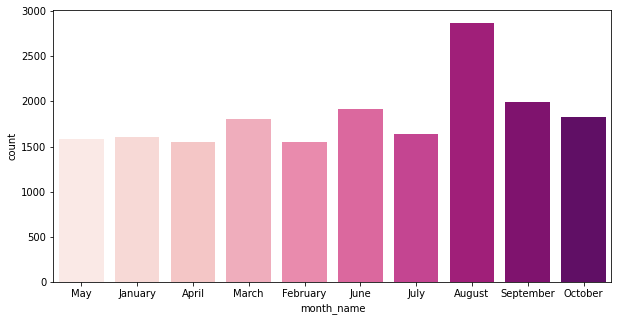

In [53]:
plt.figure(figsize = (10,5))
sns.countplot(data=active,x='month_name',palette='RdPu')

**Information**

Registered Users - Users who have completed signing up process in order to use the platform

Active Users - Users who have atleast done one of the following:
*   Watched Lesson
*   Given Quiz
*   Taken Exam

**Observation**

Out of total registered students every month only 50% of them are actively using the platform for either learning or taking quizzes or exams which means the engagement of students with the platform is pretty low.


# **Top 5 Countries by Student Registration**

In [54]:
freq_dict_country = {}
for country in registered['student_country']:
  if country in freq_dict_country:
    freq_dict_country[country] = freq_dict_country[country] + 1
  else:
    freq_dict_country[country] = 1
country = pd.DataFrame(freq_dict_country.items(),columns=['country','count'])
print(country)

    country  count
0        IN   6933
1        CO    157
2        CA   1180
3        US   4768
4        BD    362
..      ...    ...
176      GU      1
177      FJ      5
178      KY      1
179      VI      1
180      IS      2

[181 rows x 2 columns]


  country  count
0      IN   6933
1      US   4768
2      EG   3003
3      GB   1748
4      NG   1718


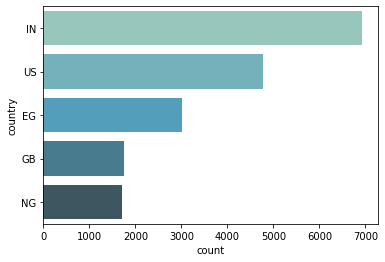

In [55]:
top_5_country = country.sort_values('count',axis=0,ascending=False).head(5)
print(top_5_country.reset_index(drop=True))
sns.barplot(data=top_5_country,x='count',y='country',palette='GnBu_d')

**Observation**

*   Most Registered Students are from India ie. 20% followed by US 13% and then Egypt with 8%.


# **Average Watch Time Every Month**

In [56]:
print(course.head())

   student_id  course_id                            course_name  \
0      258798         23                  Introduction to Excel   
1      258800          2                Introduction to Tableau   
2      258800          7  Introduction to Data and Data Science   
3      258800          7  Introduction to Data and Data Science   
4      258800          7  Introduction to Data and Data Science   

   minutes_watched date_watched  
0              0.3   01-01-2022  
1             12.9   01-04-2022  
2             46.8   03-01-2022  
3              4.3   04-01-2022  
4             31.7   07-01-2022  


In [57]:
print(course.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64535 entries, 0 to 64534
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       64535 non-null  int64  
 1   course_id        64535 non-null  int64  
 2   course_name      64464 non-null  object 
 3   minutes_watched  64535 non-null  float64
 4   date_watched     64535 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.5+ MB
None


In [58]:
course['date_watched'] = pd.to_datetime(course['date_watched'],format='%d-%m-%Y')
course['month_name'] = course['date_watched'].dt.month_name()
course['month_number'] = course['date_watched'].dt.month
avg_watch_time = course.groupby(['month_name','month_number'])['minutes_watched'].agg(['mean']).sort_values('month_number')
print(avg_watch_time)

                              mean
month_name month_number           
January    1             24.445656
February   2             28.341278
March      3             29.680446
April      4             29.911436
May        5             28.271908
June       6             27.860480
July       7             29.303530
August     8             31.895304
September  9             25.749243
October    10            27.088878


**Information**

*   March 21st – March 31st (Spring Special Offer 2022)

*  April 20th – May 1st (Data Science Summer Campaign 2022)

*   July 18th – July 29th (Most Wanted Campaign)

**Observation**

*   Average watch time was high in March, April, July, and August that's when marketing campaigns and promo periods were going on.



# **Top 5 Most Watched Courses**

In [59]:
print(course.head())

   student_id  course_id                            course_name  \
0      258798         23                  Introduction to Excel   
1      258800          2                Introduction to Tableau   
2      258800          7  Introduction to Data and Data Science   
3      258800          7  Introduction to Data and Data Science   
4      258800          7  Introduction to Data and Data Science   

   minutes_watched date_watched month_name  month_number  
0              0.3   2022-01-01    January             1  
1             12.9   2022-04-01      April             4  
2             46.8   2022-01-03    January             1  
3              4.3   2022-01-04    January             1  
4             31.7   2022-01-07    January             1  


In [60]:
print(course.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64535 entries, 0 to 64534
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   student_id       64535 non-null  int64         
 1   course_id        64535 non-null  int64         
 2   course_name      64464 non-null  object        
 3   minutes_watched  64535 non-null  float64       
 4   date_watched     64535 non-null  datetime64[ns]
 5   month_name       64535 non-null  object        
 6   month_number     64535 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 3.4+ MB
None


In [61]:
course_watch_time = course.groupby('course_name')['minutes_watched'].agg(['sum']).sort_values('sum',ascending=False).head(5)
print(course_watch_time)

                                            sum
course_name                                    
Introduction to Data and Data Science  333265.9
SQL                                    234824.8
Statistics                             193279.6
Introduction to Excel                  164472.1
Python Programmer Bootcamp             155164.3


**Observation**

*   Introduction to Data Science, SQL, Statistics, Excel and Python are top 5 most watched courses.

*   Majority of the students prefer to watch basic courses compared to advance.







# **Lessons Watched**

In [62]:
lessons = engagement[['student_id','engagement_lessons']]
print(lessons)

       student_id  engagement_lessons
0          274999                   1
1          274501                   1
2          272842                   1
3          275173                   1
4          274876                   0
...           ...                 ...
65366      295185                   1
65367      282935                   1
65368      292048                   1
65369      295443                   1
65370      284482                   1

[65371 rows x 2 columns]


In [63]:
lessons_watched = lessons.groupby(['engagement_lessons'])['student_id'].agg(['count'])
print(lessons_watched)

                    count
engagement_lessons       
0                     870
1                   64501


**Observation**

*   98.67% of students are watching lessons.




# **Quizzes Given**

In [64]:
quizzes = engagement[['student_id','engagement_quizzes']]
print(quizzes)

       student_id  engagement_quizzes
0          274999                   1
1          274501                   0
2          272842                   1
3          275173                   0
4          274876                   0
...           ...                 ...
65366      295185                   0
65367      282935                   0
65368      292048                   0
65369      295443                   0
65370      284482                   0

[65371 rows x 2 columns]


In [65]:
quizzes_given = quizzes.groupby(['engagement_quizzes'])['student_id'].agg(['count'])
print(quizzes_given)

                    count
engagement_quizzes       
0                   42146
1                   23225


**Observation**

*   Only 35% of students have given quizzes rest 64% have not.











# **Exams Taken**

In [68]:
exams = engagement[['student_id','engagement_exams']]
print(exams)

       student_id  engagement_exams
0          274999                 1
1          274501                 0
2          272842                 1
3          275173                 0
4          274876                 1
...           ...               ...
65366      295185                 0
65367      282935                 1
65368      292048                 0
65369      295443                 0
65370      284482                 0

[65371 rows x 2 columns]


In [69]:
exams_taken = exams.groupby(['engagement_exams'])['student_id'].agg(['count'])
print(exams_taken)

                  count
engagement_exams       
0                 51073
1                 14298


**Observation**

*   Only 21.87% of students have taken exams.

*   78.13% of students have not taken exams.






# **Recommendations**


*   Gamify the Platform(eg.Badges, Points, Levels and Leaderboards) so it can encourage the students to learn more and engage at the same time.

*   A peer-to-peer learning discussion forum can address feelings of isolation, increase engagement and provide valuable feedback for improving training processes and content.

*   The next video lectures should only be unlocked once the quiz from the previous lecture is completed, since only 35% of students have given quizzes.

*   Have a notification feature that will remind the students from time to time about the exam.



